<a href="https://colab.research.google.com/github/Nishimura35/weatherwise-marina-nishimura/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# =====================================
# 1. Setup and Configuation
# =====================================
!pip install pyinputplus
!pip install fetch-my-weather
# !pip install hands-on-ai

import os
import re

import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

import fetch_my_weather
# from hands_on_ai.chat import get_response


# os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
# os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
# os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=7d76aee728530aa9654c8abc85b6371de09d6f6bedeeb7aa45c473cabfb7f102
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=eb151563bf72e4a1b915a72b424cf8af03a300c14993b4b304a7c014d7163e52
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

Hi I'm Weatherwise App!
I can help you check the weather forecast.
Which city are you interested in? (type 'exit' to quit)
Perth
How many days forecast? (1-3): 3
current_condition=[CurrentCondition(FeelsLikeC='24', FeelsLikeF='75', cloudcover='0', humidity='31', localObsDateTime='2025-05-28 04:55 PM', observation_time='08:55 AM', precipInches='0.0', precipMM='0.0', pressure='1016', pressureInches='30', temp_C='23', temp_F='73', uvIndex='1', visibility='10', visibilityMiles='6', weatherCode='113', weatherDesc=[WeatherDesc(value='Sunny')], weatherIconUrl=[WeatherIconUrl(value='')], winddir16Point='ENE', winddirDegree='62', windspeedKmph='20', windspeedMiles='13')] nearest_area=[NearestArea(areaName=[AreaName(value='Maylands')], country=[Country(value='Australia')], latitude='-31.933', longitude='115.883', population='10447', region=[Region(value='Western Australia')], weatherUrl=[WeatherIconUrl(value='')])] request=[Request(query='Lat -31.95 and Lon 115.86', type='LatLon')] weather=[Dail

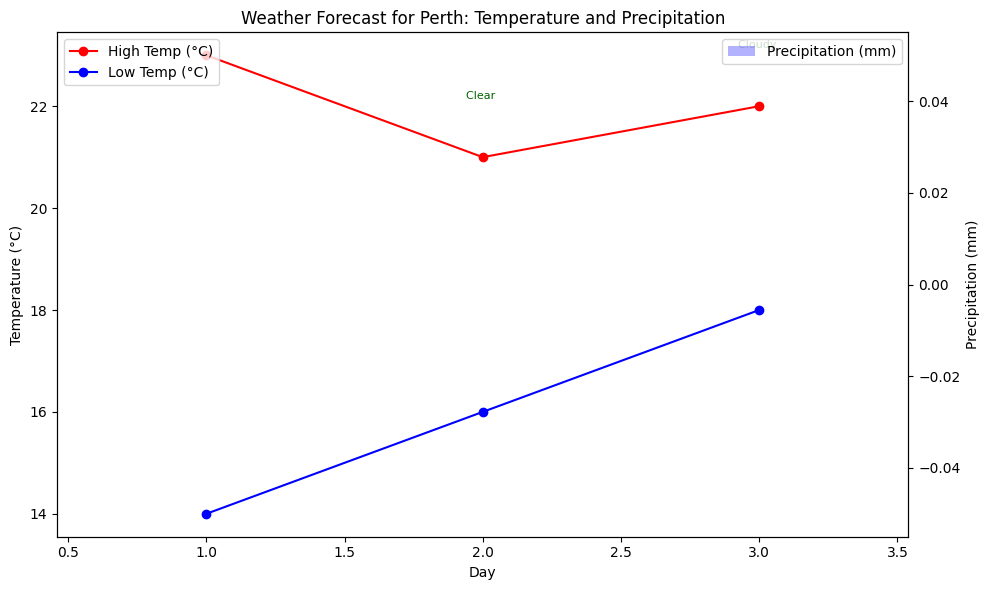

KeyboardInterrupt: Interrupted by user

In [33]:
# =====================================
# 2. Weather Data Functions
# =====================================
# Get weather data
def get_weather_data(location: str, forecast_days: int = 3, units='m') -> dict:
  try:
    if forecast_days < 1 or forecast_days > 5:
      return {"error": "forecast_days must be between 1 and 5"}

    response = fetch_my_weather.get_weather(
      location=location,
      units=units,
      view_options=str(forecast_days)
    )

    forecast = []
    raw_text = str(response)
    condition_pattern = r"weatherDesc=\[WeatherDesc\(value='([^']+)'\)\]"
    conditions = re.findall(condition_pattern, raw_text)

    max_temps = re.findall(r"maxtempC='(\d+)'", raw_text)
    min_temps = re.findall(r"mintempC='(\d+)'", raw_text)
    precips = re.findall(r"precipMM='([\d.]+)'", raw_text)

    for i in range(forecast_days):
      if i < len(max_temps) and i < len(min_temps) and i < len(precips):
        high = int(max_temps[i])
        low = int(min_temps[i])
        rain = float(precips[i])
        condition = conditions[i] if i < len(conditions) else "Unknown"

        forecast.append({
          "day": i + 1,
          "condition": condition,
          "high_temp": high,
          "low_temp": low,
          "precipitation_mm": float(rain)
        })

    return {
      "location": location,
      "forecast_days": len(forecast),
      "forecast": forecast
    }

  # Connection error
  except ConnectionError:
    print("Network error. Please check your connection and try again.")
    return None

  # Value error
  except ValueError as ve:
    print(f"Invalid input value: {ve}")
    return None

  # Unexpected error
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    return None


# =====================================
# 3. Preprocess Functions
# =====================================
# Preprocess the forecast
'''
def preprocess_forecast_data(raw_data):
  processed = []
  for entry in raw_data:
    high = int(entry['high_temp'].replace("°C", "").replace("+", ""))
    low = int(entry['low_temp'].replace("°C", "").replace("+", ""))
    processed.append({
      "day": entry['day'],
      "condition": entry.get('condition', "Unknown"),
      "high_temp": high,
      "low_temp": low,
      "precipitation_mm": entry['precipitation_mm']
    })
  return processed
'''

# =====================================
# 4. Visualisation Functions
# =====================================
# Show the weather forecast
def create_visualisation(forecast, location, output_type='display'):
  days = [entry['day'] for entry in forecast]
  high_temps = [entry['high_temp'] for entry in forecast]
  low_temps = [entry['low_temp'] for entry in forecast]
  precipitation = [entry['precipitation_mm'] for entry in forecast]

  fig, ax1 = plt.subplots(figsize=(10, 6))

  # Plot temperature lines on left y-axis
  ax1.plot(days, high_temps, color='red', marker='o', label='High Temp (°C)')
  ax1.plot(days, low_temps, color='blue', marker='o', label='Low Temp (°C)')
  ax1.set_xlabel('Day')
  ax1.set_ylabel('Temperature (°C)')
  ax1.legend(loc='upper left')

  # Create second y-axis for precipitation bars
  ax2 = ax1.twinx()
  ax2.bar(days, precipitation, alpha=0.3, color='blue', label='Precipitation (mm)')
  ax2.set_ylabel('Precipitation (mm)')
  ax2.legend(loc='upper right')

  for i, condition in enumerate([entry.get('condition', '') for entry in forecast]):
    ax1.annotate(
      condition,
      (days[i], high_temps[i] + 1),
      textcoords="offset points",
      xytext=(0, 5),
      ha='center',
      fontsize=8,
      color='darkgreen'
    )

  plt.title(f'Weather Forecast for {location}: Temperature and Precipitation')
  plt.tight_layout()
  safe_location = re.sub(r'\W+', '_', location)

  if output_type == 'figure':
    return fig
  elif output_type == 'save':
    plt.savefig(f"{forecast[0]['day']}_{safe_location}_forecast.png")
    print("Graph saved!")
    plt.close(fig)
  else:
    plt.show()
    plt.close(fig)

def display_forecast(weather_data, days):
    print(f"Weather forecast for {weather_data.nearest_area[0].areaName[0].value}:\n")

    for day in weather_data.weather[:days]:
        date = day.date
        desc = day.hourly[4].weatherDesc[0].value.strip()
        max_temps = day.maxtempC
        min_temps = day.mintempC
        print(f"{date}: {desc}, Max: {max_temps}°C, Min: {min_temps}°C")


# Natural Language Processing
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass


def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

# =====================================
# 5. Main function
# =====================================
def main():
  print("Hi I'm Weatherwise App!")
  print("I can help you check the weather forecast.")

  while True:
    try:
      location = input("Which city are you interested in? (type 'exit' to quit)\n")
      if location.lower() == 'exit':
        print("Goodbye! Have a nice day!")
        break

      if not location:
        print("Please enter a city name.")
        continue

      forecast_days = pyip.inputInt(prompt="How many days forecast? (1-3): ", min=1, max=3)
      weather_data = get_weather_data(
        location=location,
        forecast_days=forecast_days,
        units='m'
      )

      if not weather_data:
        print("Oops! No weather data returned.")
      elif "error" in weather_data:
        print(f"Oops! Something went wrong: {weather_data['error']}")
      elif not weather_data.get("forecast"):
        print("Oops! No forecast data received. Please try a different location or day range.")
      else:
        for day in weather_data["forecast"]:
          print(f"Day {day['day']}: {day['condition']}, High: {day['high_temp']}, "
                f"Low: {day['low_temp']}, Precipitation: {day['precipitation_mm']} mm")

        create_visualisation(weather_data["forecast"], location)

    except ConnectionError:
      print("It looks like there's a problem with your internet connection. Please check and try again.")
    except Exception as e:
      print(f"Oops! Something went wrong: {e}")
      print("Please try again or contact support if the issue persists.")


# =====================================
# 5. Main Script
# =====================================
if __name__ == '__main__':
    main()

# Testing and Examples
# Include sample input/output for each function